<a href="https://colab.research.google.com/github/Lucas-Jimenez-uribe/telecom_x/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [206]:
df = pd.read_json('/content/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [207]:
df.shape

(7267, 6)

#🔧 Transformación

In [208]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [210]:
df_original = df.copy()

col_inicio = df.columns.get_loc('customer')

# Seleccionar todas las columnas desde esa en adelante
cols_a_normalizar = df.columns[col_inicio:]

# Extraer esas columnas como diccionarios por fila
registros = df[cols_a_normalizar].to_dict(orient='records')

# Normalizar
df = df_normalizado = pd.json_normalize(registros)

# Guardar las columnas que quedaron afuera
columnas_anteriores = df_original[['customerID', 'Churn']].reset_index(drop=True)

# Unirlas al nuevo dataframe normalizado
df = pd.concat([columnas_anteriores, df_normalizado], axis=1)

In [211]:
df.duplicated().sum()
df = df.drop_duplicates()

In [212]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [214]:
# Lista de columnas donde vas a reemplazar NaN por 0
columnas_binarias = [
    'cliente_cancelado',
    'lineas_telefonicas_multiples',
    'internet_proteccion_dispositivo',
    'internet_soporte_tecnico',
    'internet_streaming_tv',
    'internet_streaming_peliculas',
]



In [216]:
df['account.Charges.Total'].unique()

df['account.Charges.Total'] = df['account.Charges.Total'].replace('', np.nan)

df['account.Charges.Total'] = df['account.Charges.Total'].str.strip()

df['account.Charges.Total'] = df['account.Charges.Total'].astype(float)



In [217]:
# Aplicar str.lower() y str.strip() a todas las columnas de texto
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()


In [220]:
# Ver cuántas veces aparecen en cada columna
valores_nulos_falsos = ['n/a', 'na', 'null', 'none', '']

for valor in valores_nulos_falsos:
    print(f"--- Buscando '{valor}' ---")
    print((df == valor).sum())



--- Buscando 'n/a' ---
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64
--- Buscando 'na' ---
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.Int

In [ ]:
df.info()

In [ ]:
df.columns

In [223]:
df = df.rename(columns={
    'customerID': 'cliente_id',
    'Churn': 'cliente_cancelado',
    'customer.gender': 'cliente_genero',
    'customer.SeniorCitizen': 'cliente_es_senior',
    'customer.Partner': 'cliente_tiene_pareja',
    'customer.Dependents': 'cliente_tiene_dependientes',
    'customer.tenure': 'cliente_antiguedad_meses',

    'phone.PhoneService': 'servicio_telefonico',
    'phone.MultipleLines': 'lineas_telefonicas_multiples',

    'internet.InternetService': 'internet_tipo',
    'internet.OnlineSecurity': 'internet_seguridad_en_linea',
    'internet.OnlineBackup': 'internet_respaldo_en_linea',
    'internet.DeviceProtection': 'internet_proteccion_dispositivo',
    'internet.TechSupport': 'internet_soporte_tecnico',
    'internet.StreamingTV': 'internet_streaming_tv',
    'internet.StreamingMovies': 'internet_streaming_peliculas',

    'account.Contract': 'cuenta_contrato',
    'account.PaperlessBilling': 'cuenta_facturacion_electronica',
    'account.PaymentMethod': 'cuenta_metodo_pago',
    'account.Charges.Monthly': 'cuenta_cargos_mensuales',
    'account.Charges.Total': 'cuenta_cargos_totales'
})


In [ ]:
df.head()

In [225]:
df['cuentas_diarias'] = (df['cuenta_cargos_mensuales'] / 30).round(2)

In [226]:
columnas_binarias = ['cliente_cancelado', 'cliente_tiene_pareja', 'cliente_tiene_dependientes', 'servicio_telefonico', 'lineas_telefonicas_multiples','internet_proteccion_dispositivo', 'internet_soporte_tecnico','internet_streaming_tv','internet_streaming_peliculas','cuenta_facturacion_electronica' ]
for col in columnas_binarias:
    df[col] = df[col].map({'yes': 1, 'no': 0})



In [228]:
for col in columnas_binarias:
    print(f"{col}: {df[col].unique()}")

df[columnas_binarias] = df[columnas_binarias].fillna(0)


cliente_cancelado: [0. 1.]
cliente_tiene_pareja: [1 0]
cliente_tiene_dependientes: [1 0]
servicio_telefonico: [1 0]
lineas_telefonicas_multiples: [0. 1.]
internet_proteccion_dispositivo: [0. 1.]
internet_soporte_tecnico: [1. 0.]
internet_streaming_tv: [1. 0.]
internet_streaming_peliculas: [0. 1.]
cuenta_facturacion_electronica: [1 0]


In [229]:
columnas_binarias

['cliente_cancelado',
 'cliente_tiene_pareja',
 'cliente_tiene_dependientes',
 'servicio_telefonico',
 'lineas_telefonicas_multiples',
 'internet_proteccion_dispositivo',
 'internet_soporte_tecnico',
 'internet_streaming_tv',
 'internet_streaming_peliculas',
 'cuenta_facturacion_electronica']

#📊 Carga y análisis

In [230]:
df.head()

,cliente_id,cliente_cancelado,cliente_genero,cliente_es_senior,cliente_tiene_pareja,cliente_tiene_dependientes,cliente_antiguedad_meses,servicio_telefonico,lineas_telefonicas_multiples,internet_tipo,...,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_streaming_tv,internet_streaming_peliculas,cuenta_contrato,cuenta_facturacion_electronica,cuenta_metodo_pago,cuenta_cargos_mensuales,cuenta_cargos_totales,cuentas_diarias
0,0002-orfbo,0.0,female,0,1,1,9,1,0.0,dsl,...,0.0,1.0,1.0,0.0,one year,1,mailed check,65.6,593.30,2.19
1,0003-mknfe,0.0,male,0,0,0,9,1,1.0,dsl,...,0.0,0.0,0.0,1.0,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-tlhlj,1.0,male,0,0,0,4,1,0.0,fiber optic,...,1.0,0.0,0.0,0.0,month-to-month,1,electronic check,73.9,280.85,2.46
3,0011-igkff,1.0,male,1,1,0,13,1,0.0,fiber optic,...,1.0,0.0,1.0,1.0,month-to-month,1,electronic check,98.0,1237.85,3.27
4,0013-exchz,1.0,female,1,1,0,3,1,0.0,fiber optic,...,0.0,1.0,1.0,0.0,month-to-month,1,mailed check,83.9,267.40,2.80


In [231]:
df.describe()

,cliente_cancelado,cliente_es_senior,cliente_tiene_pareja,cliente_tiene_dependientes,cliente_antiguedad_meses,servicio_telefonico,lineas_telefonicas_multiples,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_streaming_tv,internet_streaming_peliculas,cuenta_facturacion_electronica,cuenta_cargos_mensuales,cuenta_cargos_totales,cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,2.157292
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


<ipython-input-232-1343718770>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cliente_cancelado', ax=axes[0], palette=['#5DADE2', '#E74C3C'])


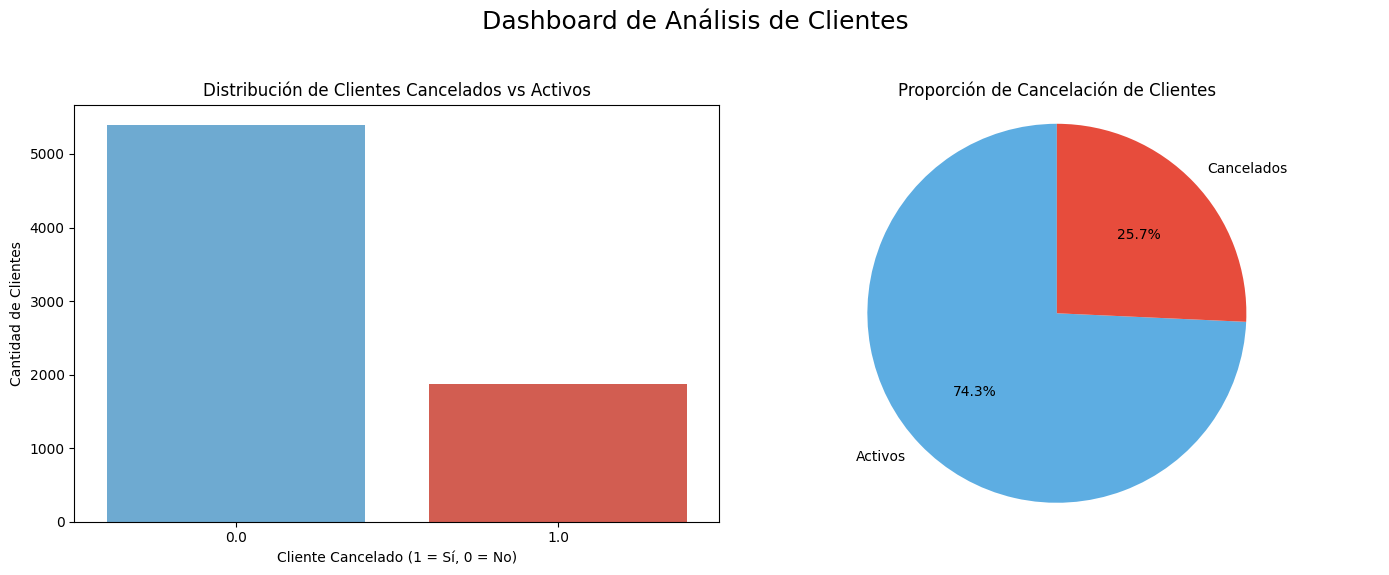

In [232]:

# 1. Crear la figura y la cuadrícula de 1x2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.suptitle('Dashboard de Análisis de Clientes', fontsize=18)

# --- Gráfica 1: Distribución (Izquierda) [axes[0]] ---
sns.countplot(data=df, x='cliente_cancelado', ax=axes[0], palette=['#5DADE2', '#E74C3C'])
axes[0].set_title('Distribución de Clientes Cancelados vs Activos')
axes[0].set_xlabel('Cliente Cancelado (1 = Sí, 0 = No)')
axes[0].set_ylabel('Cantidad de Clientes')

# --- Gráfica 2: Proporción (Derecha) [axes[1]] ---
# Primero, calculamos los valores para la gráfica de torta
valores = df['cliente_cancelado'].value_counts()
labels = ['Activos', 'Cancelados']
colors = ['#5DADE2', '#E74C3C']

# Ahora, dibujamos la gráfica en el eje correspondiente
axes[1].pie(valores, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Proporción de Cancelación de Clientes')
axes[1].axis('equal')  # Asegura que la gráfica de torta sea circular

# 3. Ajustar y mostrar la figura completa
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # El rect deja espacio para el título general
plt.show()

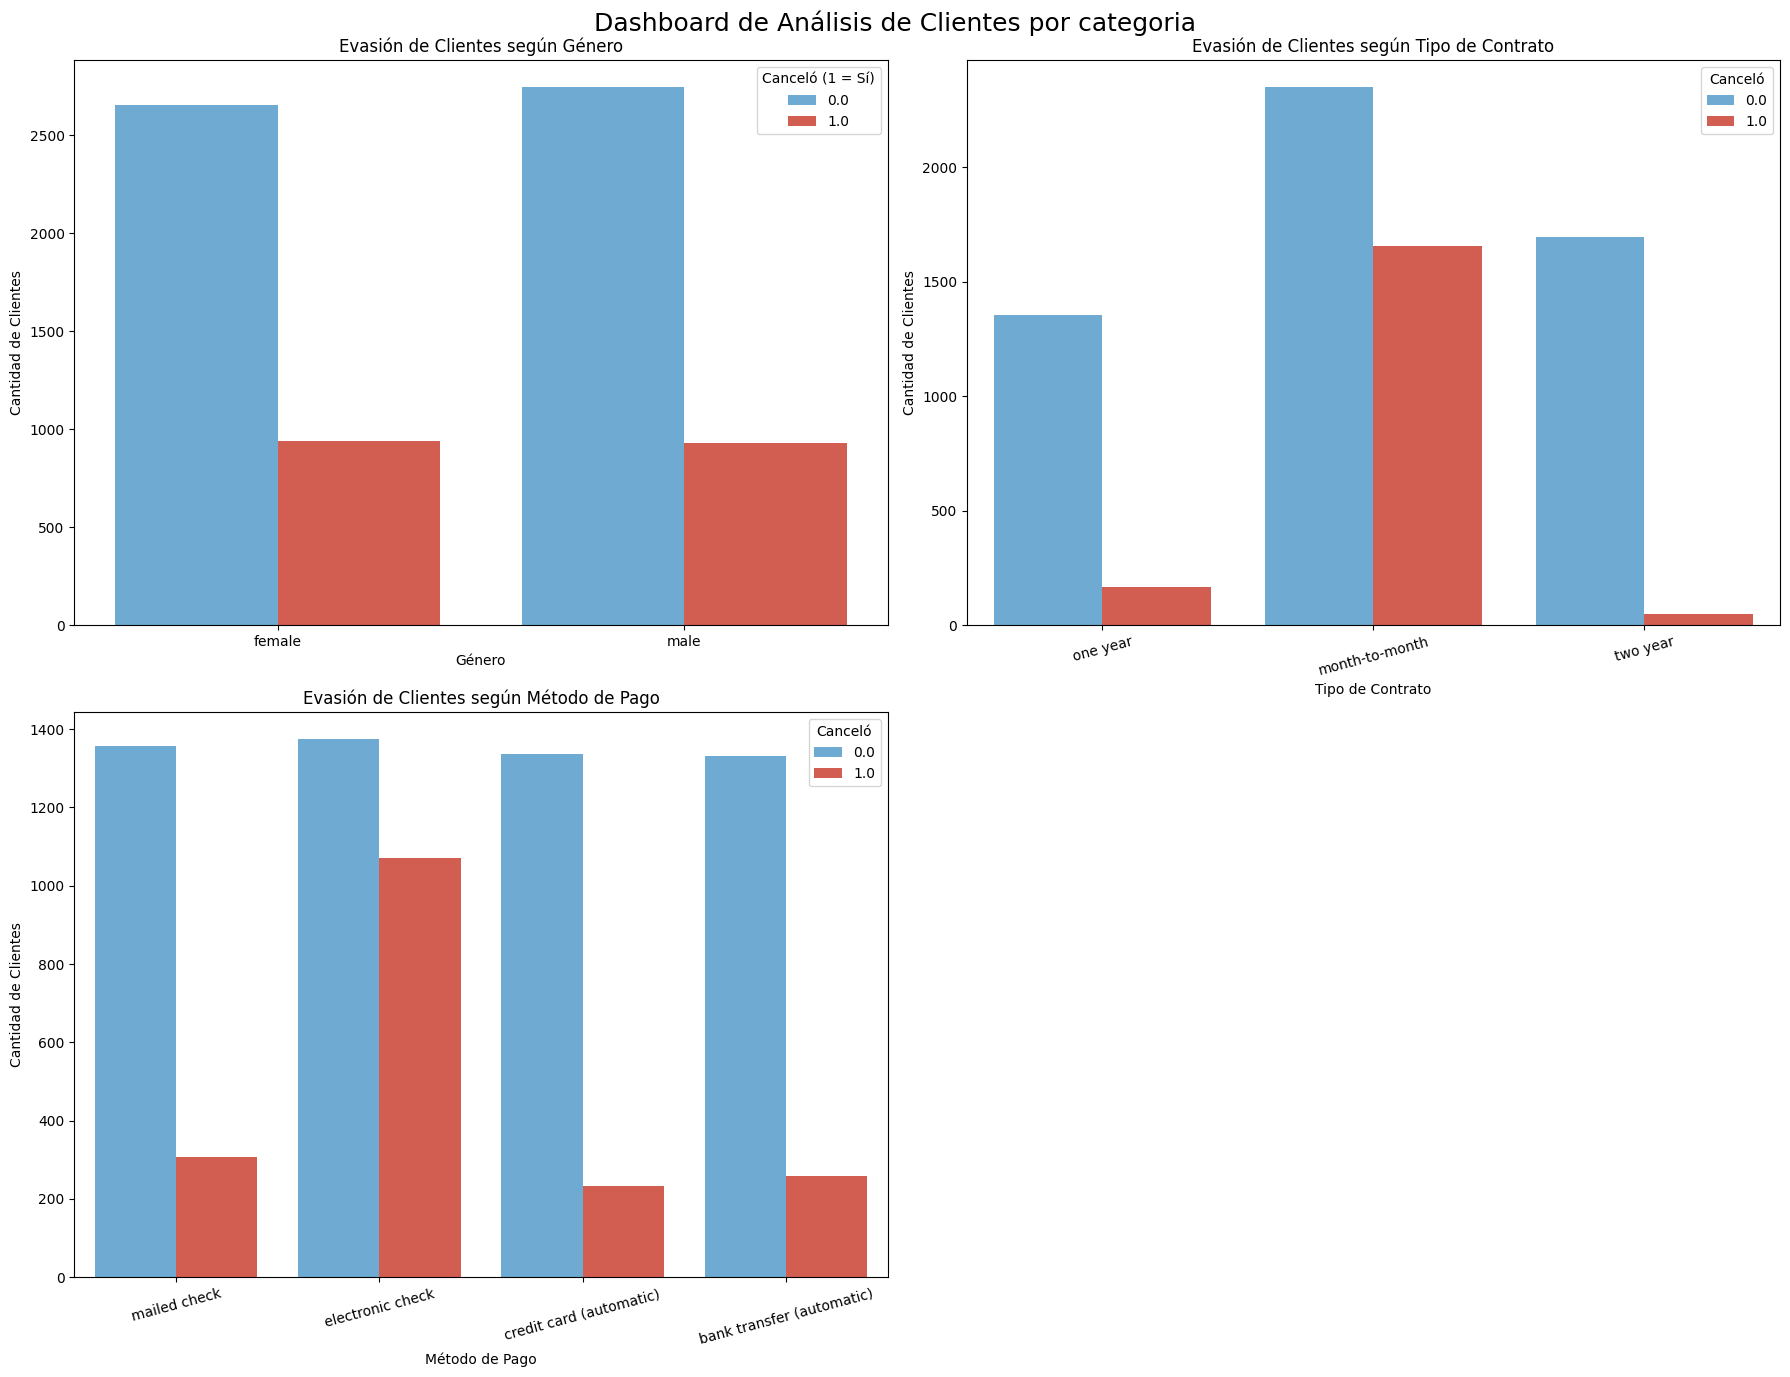

In [233]:
# Crear la figura y la cuadrícula para 3 subplots (2 filas, 2 columnas)
# Esto crea una cuadrícula de 4 espacios, dejando uno vacío.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 14))
fig.suptitle('Dashboard de Análisis de Clientes por categoria', fontsize=18)

# --- Primera figura: Evasión de Clientes según Género (axes[0, 0]) ---
sns.countplot(data=df, x='cliente_genero', hue='cliente_cancelado', palette=['#5DADE2', '#E74C3C'], ax=axes[0, 0])
axes[0, 0].set_title('Evasión de Clientes según Género')
axes[0, 0].set_xlabel('Género')
axes[0, 0].set_ylabel('Cantidad de Clientes')
axes[0, 0].legend(title='Canceló (1 = Sí)')

# --- Segunda figura: Evasión de Clientes según Tipo de Contrato (axes[0, 1]) ---
sns.countplot(data=df, x='cuenta_contrato', hue='cliente_cancelado', palette=['#5DADE2', '#E74C3C'], ax=axes[0, 1])
axes[0, 1].set_title('Evasión de Clientes según Tipo de Contrato')
axes[0, 1].set_xlabel('Tipo de Contrato')
axes[0, 1].set_ylabel('Cantidad de Clientes')
axes[0, 1].legend(title='Canceló')
axes[0, 1].tick_params(axis='x', rotation=15) # Rotar las etiquetas del eje X

# --- Tercera figura: Evasión de Clientes según Método de Pago (axes[1, 0]) ---
sns.countplot(data=df, x='cuenta_metodo_pago', hue='cliente_cancelado', palette=['#5DADE2', '#E74C3C'], ax=axes[1, 0])
axes[1, 0].set_title('Evasión de Clientes según Método de Pago')
axes[1, 0].set_xlabel('Método de Pago')
axes[1, 0].set_ylabel('Cantidad de Clientes')
axes[1, 0].legend(title='Canceló')
axes[1, 0].tick_params(axis='x', rotation=15) # Rotar las etiquetas del eje X

# --- Ocultar el cuarto subplot (axes[1, 1]) ya que no lo estamos usando ---
axes[1, 1].axis('off')

# Ajustar el diseño para evitar superposiciones y mostrar la figura
plt.tight_layout()
plt.show()

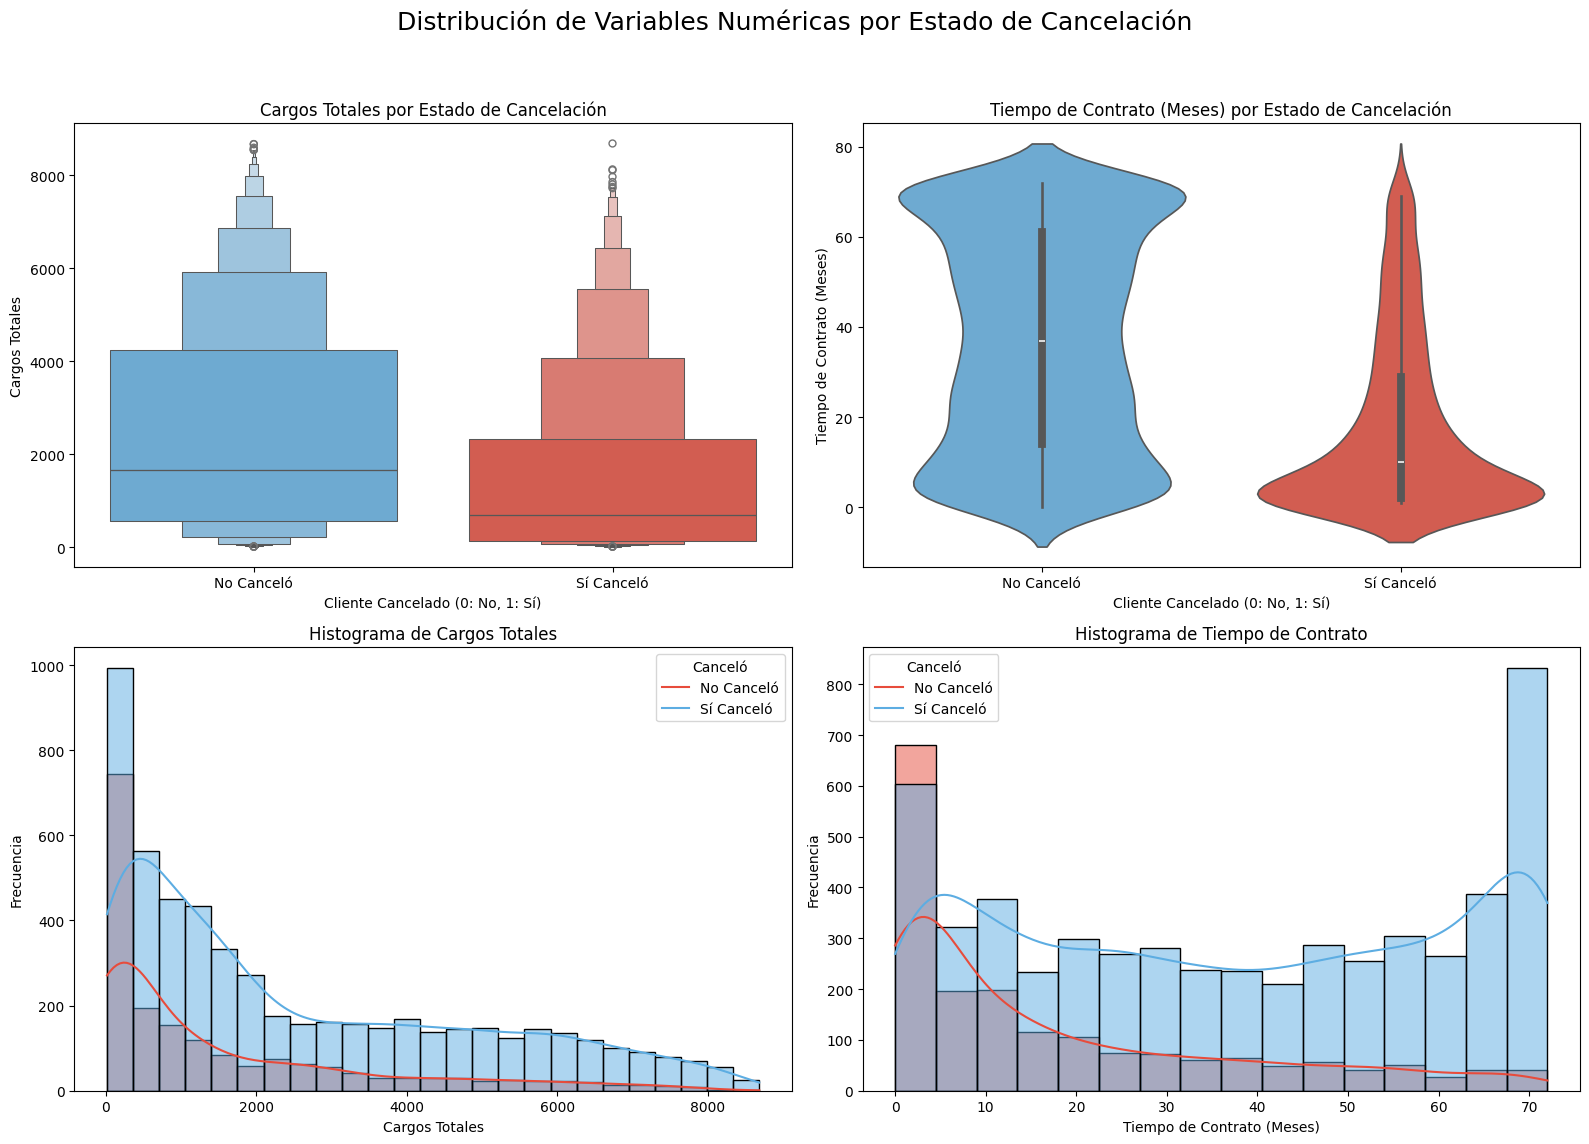

In [237]:
# Crear la figura y la cuadrícula para los subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Distribución de Variables Numéricas por Estado de Cancelación', fontsize=18)

### Gráfico 1: Distribución de 'cuenta_cargos_totales' con Boxenplot
sns.boxenplot(data=df, x='cliente_cancelado', y='cuenta_cargos_totales', hue='cliente_cancelado', ax=axes[0, 0], palette=['#5DADE2', '#E74C3C'], legend=False)
axes[0, 0].set_title('Cargos Totales por Estado de Cancelación')
axes[0, 0].set_xlabel('Cliente Cancelado (0: No, 1: Sí)')
axes[0, 0].set_ylabel('Cargos Totales')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['No Canceló', 'Sí Canceló'])


### Gráfico 2: Distribución de 'tiempo_contrato_meses' con Violinplot
sns.violinplot(data=df, x='cliente_cancelado', y='cliente_antiguedad_meses', hue='cliente_cancelado', ax=axes[0, 1], palette=['#5DADE2', '#E74C3C'], legend=False)
axes[0, 1].set_title('Tiempo de Contrato (Meses) por Estado de Cancelación')
axes[0, 1].set_xlabel('Cliente Cancelado (0: No, 1: Sí)')
axes[0, 1].set_ylabel('Tiempo de Contrato (Meses)')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['No Canceló', 'Sí Canceló'])

### Gráfico 3: Histograma de 'cuenta_cargos_totales' por Estado de Cancelación
sns.histplot(data=df, x='cuenta_cargos_totales', hue='cliente_cancelado', kde=True, ax=axes[1, 0], palette=['#5DADE2', '#E74C3C'])
axes[1, 0].set_title('Histograma de Cargos Totales')
axes[1, 0].set_xlabel('Cargos Totales')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].legend(title='Canceló', labels=['No Canceló', 'Sí Canceló']) # Ajustado el orden de las etiquetas si es necesario


### Gráfico 4: Histograma de 'Tiempo de Contrato' por Estado de Cancelación
sns.histplot(data=df, x='cliente_antiguedad_meses', hue='cliente_cancelado', kde=True, ax=axes[1, 1], palette=['#5DADE2', '#E74C3C'])
axes[1, 1].set_title('Histograma de Tiempo de Contrato')
axes[1, 1].set_xlabel('Tiempo de Contrato (Meses)')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].legend(title='Canceló', labels=['No Canceló', 'Sí Canceló']) # Ajustado el orden de las etiquetas si es necesario


# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Deja espacio para el título principal
plt.show()

In [235]:
df

,cliente_id,cliente_cancelado,cliente_genero,cliente_es_senior,cliente_tiene_pareja,cliente_tiene_dependientes,cliente_antiguedad_meses,servicio_telefonico,lineas_telefonicas_multiples,internet_tipo,...,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_streaming_tv,internet_streaming_peliculas,cuenta_contrato,cuenta_facturacion_electronica,cuenta_metodo_pago,cuenta_cargos_mensuales,cuenta_cargos_totales,cuentas_diarias
0,0002-orfbo,0.0,female,0,1,1,9,1,0.0,dsl,...,0.0,1.0,1.0,0.0,one year,1,mailed check,65.60,593.30,2.19
1,0003-mknfe,0.0,male,0,0,0,9,1,1.0,dsl,...,0.0,0.0,0.0,1.0,month-to-month,0,mailed check,59.90,542.40,2.00
2,0004-tlhlj,1.0,male,0,0,0,4,1,0.0,fiber optic,...,1.0,0.0,0.0,0.0,month-to-month,1,electronic check,73.90,280.85,2.46
3,0011-igkff,1.0,male,1,1,0,13,1,0.0,fiber optic,...,1.0,0.0,1.0,1.0,month-to-month,1,electronic check,98.00,1237.85,3.27
4,0013-exchz,1.0,female,1,1,0,3,1,0.0,fiber optic,...,0.0,1.0,1.0,0.0,month-to-month,1,mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,0.0,female,0,0,0,13,1,0.0,dsl,...,0.0,1.0,0.0,0.0,one year,0,mailed check,55.15,742.90,1.84
7263,9992-rramn,1.0,male,0,1,0,22,1,1.0,fiber optic,...,0.0,0.0,0.0,1.0,month-to-month,1,electronic check,85.10,1873.70,2.84
7264,9992-ujoel,0.0,male,0,0,0,2,1,0.0,dsl,...,0.0,0.0,0.0,0.0,month-to-month,1,mailed check,50.30,92.75,1.68
7265,9993-lhieb,0.0,male,0,1,1,67,1,0.0,dsl,...,1.0,1.0,0.0,1.0,two year,0,mailed check,67.85,4627.65,2.26


#📄Informe final